# IA - 2020.1 (Prof. Rafael Magalhães)
## Turmas LCC e SI

### Exercício Prático - Fundamentos de IA

Classificação de Qualidade de Vinhos do tipo 'Tinto' (Arquivo fornecido junto com notebook - 'winequality-red.csv')

Olá Pessoal,

Ests prática de código tem três principais objetivos:

- Recapitular alguns elementos da linguem Python (sintaxe, estrutura, etc.)
- Conhecer algumas das bibliotecas mais utilizadas na área de IA e ML em Python
- Captar o essencial do workflow (conjunto de etapas) para criação de 'modelos' de classificadores inteligentes.

Para tanto, siga as instruções e conclua as etapas a seguir. Você é livre para buscar ajuda nas página oficiais de cada biblioteca se desejar.

As Etapas que deverá realizar são:

- Extração de Atributos
- Divisão dos Dados
- Treinamento do(s) Modelo(s)
- Avaliação do(s) Modelo(s)

# 1 - Extração dos Atributos

Você deverá:

- 1.1 - carregar os dados de classificação de Vinhos Vermelhos utilizando o Pandas;
- 1.2 - Avaliar minimamente algumas informações estatísticas do conjunto de dados;
- 1.3 - Criar algumas visualizações dos dados, e, por fim;
- 1.4 - Determinar o conjunto de dados (atributos) que serão utilizados para compor o 'dataset' para criar o modelo.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt

In [ ]:
# Seus códigos para a etapa 1 deverão ser criados aqui:
arquivo = '/content/winequality-red.csv'

# dica: lembre-se de pesquisar os argumentos do método read_csv do pandas,
# especialmente o 'names' e o 'delimiter'
dataset = pd.read_csv(arquivo, sep=";", header=0)

# exibindo a dimensão dos dados carregados (linhas, colunas)
print(dataset.shape)

(1599, 12)


In [ ]:
# exibindo as 10 primeiras linhas de valores contidos no dataset
print(dataset.head(10))

# exibindo os 10 últimas linhas de valores do dataset
print(dataset.tail(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [ ]:
# Informações sobre as colunas
print(dataset.info())

# Verificando valores faltantes
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

In [ ]:
print(dataset.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


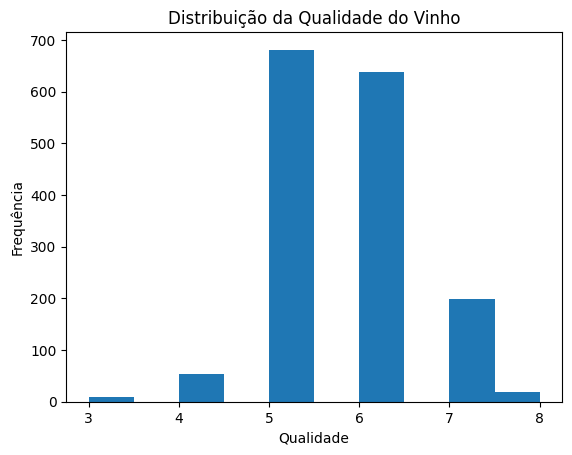

In [ ]:
# Visualizando os dados
# Histograma da qualidade do vinho
plt.hist(dataset['quality'])
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.title('Distribuição da Qualidade do Vinho')
plt.show()

# 2 - Divisão dos Dados

Usando a técina que você desejar, defina um critério para divisão dos dados e crie quatro variáveis:
```
X_train, X_test, y_train, y_test
```
cada um contendo os dados referentes às entradas e saídas de treinamento e etradas e saídas do dados de testes.

In [ ]:
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes (X) e a variável dependente (y)
X = dataset.drop('quality', axis=1)  # Todas as colunas exceto 'quality'
y = dataset['quality']  # Somente a coluna 'quality'

# Dividir o dataset em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42,  stratify=y)

# Exibir as dimensões dos conjuntos criados
print(f"Dimensão do conjunto de treinamento (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensão do vetor de treinamento (y_train): {y_train.shape}")
print(f"Dimensão do vetor de teste (y_test): {y_test.shape}")




Dimensão do conjunto de treinamento (X_train): (1279, 11)
Dimensão do conjunto de teste (X_test): (320, 11)
Dimensão do vetor de treinamento (y_train): (1279,)
Dimensão do vetor de teste (y_test): (320,)


# 3 - Treinamento do Modelo

Na etapa de treinamento caberá a você escolher um modelo disponível na biblioteca scikit-learn (sklearn), dentre os vários. Instanciar um objeto, utilizar os dados de treinamento para ajustar o modelo (fit, treinar) e realizar alguns exemplos de predição.

In [ ]:
# Seus códigos para a etapa 3 deverão ser criados aqui:

# Dica: para evitar resultados inesperados, toda vez que alterar o conjunto
# de dados é boa prática recriar o modelo.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Instanciar o modelo
modelo_arvore = DecisionTreeClassifier(random_state=42)

# 2. Treinar o modelo
modelo_arvore.fit(X_train, y_train)

# 3. Realizar previsões
y_pred_arvore = modelo_arvore.predict(X_test)





# 4 - Avaliação do Modelo

Na quarta e última etapa você deverá utilizar alguma técnica de checagem da qualidade do resultado obtido, por exemplo o percentual de acertos, ou a matrix de validação, precisão, acurácia ou qualquer outra da sua escolha.

MSE: 0.496875
R²: 0.22997760154973068
Acurácia do modelo de Árvore de Decisão: 0.61

Relatório de Classificação da Árvore de Decisão:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.38      0.27      0.32        11
           5       0.69      0.68      0.69       136
           6       0.58      0.55      0.57       128
           7       0.54      0.65      0.59        40
           8       0.14      0.33      0.20         3

    accuracy                           0.61       320
   macro avg       0.39      0.42      0.39       320
weighted avg       0.61      0.61      0.61       320

Matriz de Confusão da Árvore de Decisão:
 [[ 0  1  0  0  1  0]
 [ 1  3  4  3  0  0]
 [ 0  1 93 37  5  0]
 [ 0  3 34 71 15  5]
 [ 0  0  2 11 26  1]
 [ 0  0  1  0  1  1]]


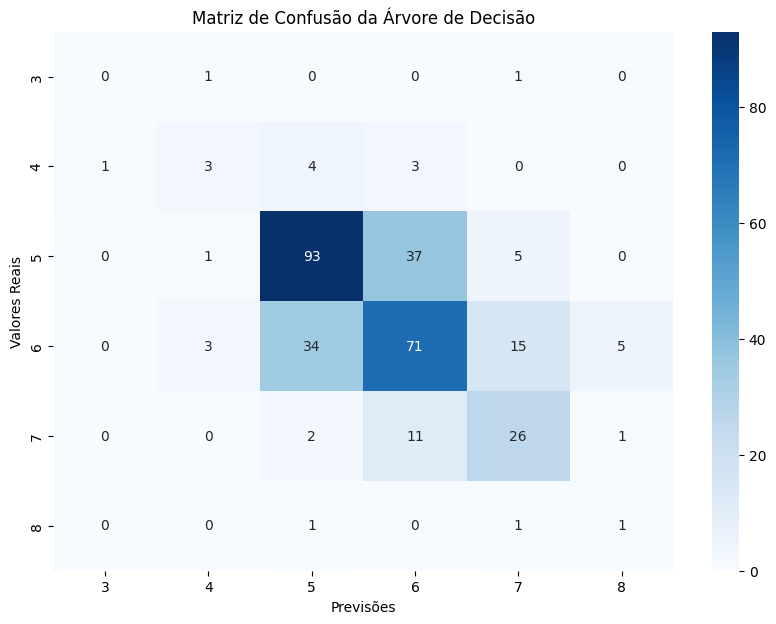

Área Sob a Curva ROC (AUC): 0.66


In [ ]:
# Seus códigos para a etapa 4 deverão ser criados aqui:
from sklearn.metrics import mean_squared_error, r2_score

# Calculando o MSE e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import seaborn as sns

# Avaliar o desempenho do modelo de Árvore de Decisão
acuracia_arvore = accuracy_score(y_test, y_pred_arvore)
relatorio_classificacao_arvore = classification_report(y_test, y_pred_arvore)
matriz_confusao_arvore = confusion_matrix(y_test, y_pred_arvore)

# Exibir a Acurácia
print(f"Acurácia do modelo de Árvore de Decisão: {acuracia_arvore:.2f}")

# Exibir o Relatório de Classificação
print("\nRelatório de Classificação da Árvore de Decisão:\n", relatorio_classificacao_arvore)

# Exibir a Matriz de Confusão
print("Matriz de Confusão da Árvore de Decisão:\n", matriz_confusao_arvore)

# Visualizar a Matriz de Confusão com Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao_arvore, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão da Árvore de Decisão')
plt.show()

# Curva ROC e AUC (mais apropriado para problemas binários)
# Para múltiplas classes, você pode calcular o AUC para cada classe e fazer uma média
# Aqui calculamos a média AUC para o exemplo
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = modelo_arvore.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

print(f"Área Sob a Curva ROC (AUC): {roc_auc:.2f}")



Ao término da atividade você deverá enviar seu código na plataforma da turma para concluir a atividade de ensino prática.